# 运行的问题：不学习

## 之前的问题

强化学习本意好的，之前出现强化学习低于没有强化学习，是被执行坏了：忘记在每个eposide开始时添加`order_unmatched = {}`

## 无论如何设置reward，grid_reward结果都一样

reward的设置：<br>
1. `reward += -punlishment`，即按次数惩罚
2. `reward += -self.orders[i].revenue`，即不同的订单被错误匹配结果不一样
grid_reward的设置：<br>
gpt认为reward过大会有梯度爆炸的风险(实际上报错的原因是`backward(retain_graph=True)`)，因此采用grid_reward替代reward<br>
1. `grid_reward = objval/(objval - reward)`
2. `grid_reward = objval/(1 + reward**2)`
3. `grid_reward = reward/(1 + reward)`（会更差，说明grid_reward有效）


## 过去好的决策在当前不一定能被贯彻

加入`if order.matched is False:`<br>
    `order.virtual_departure = order.departure `
后性能降低

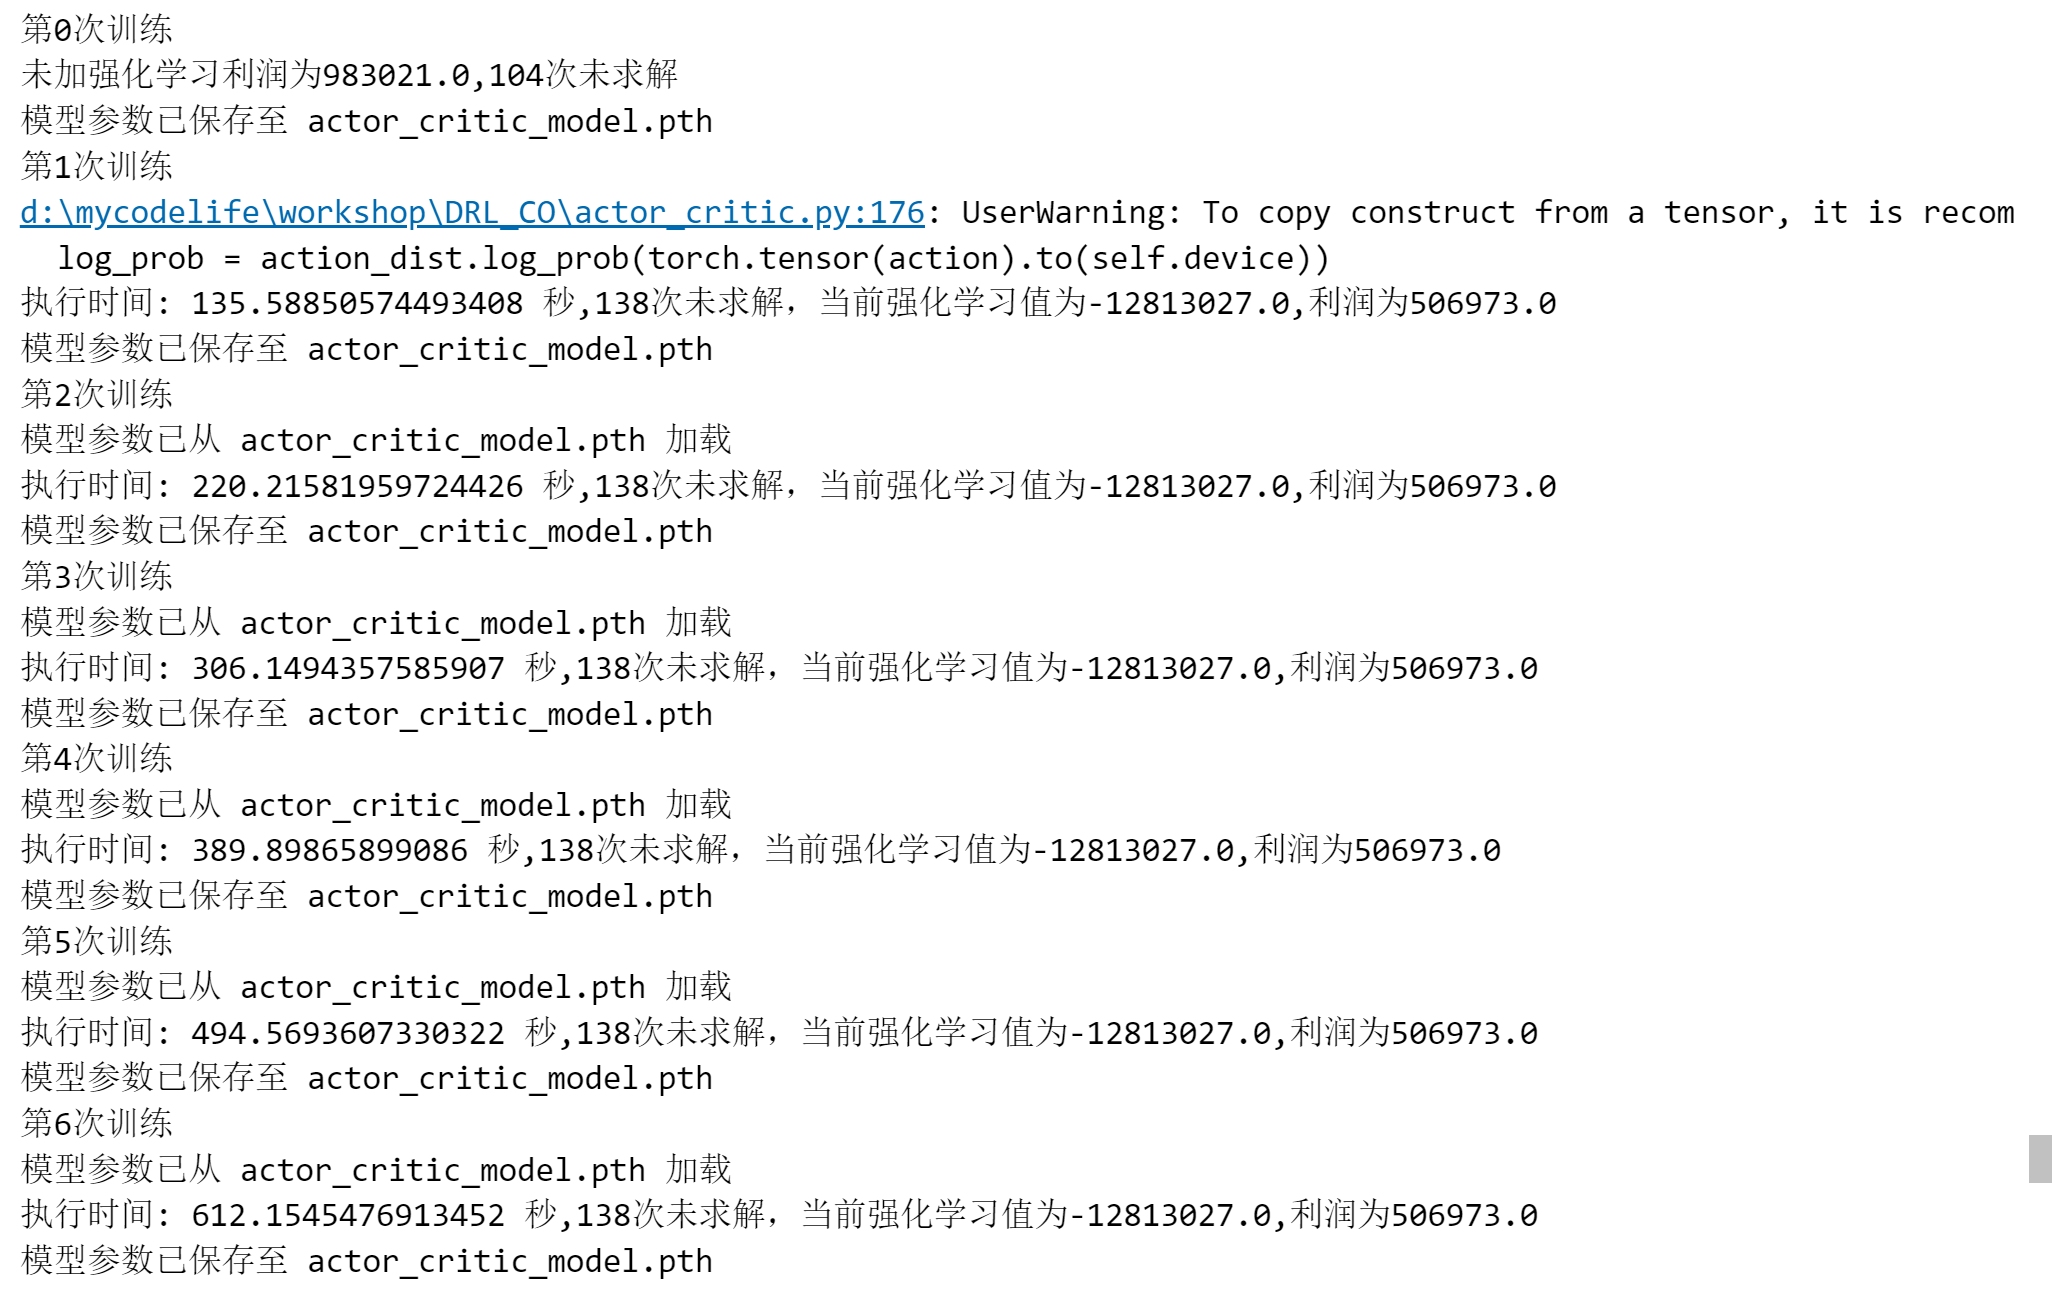

移除此代码后结果如下

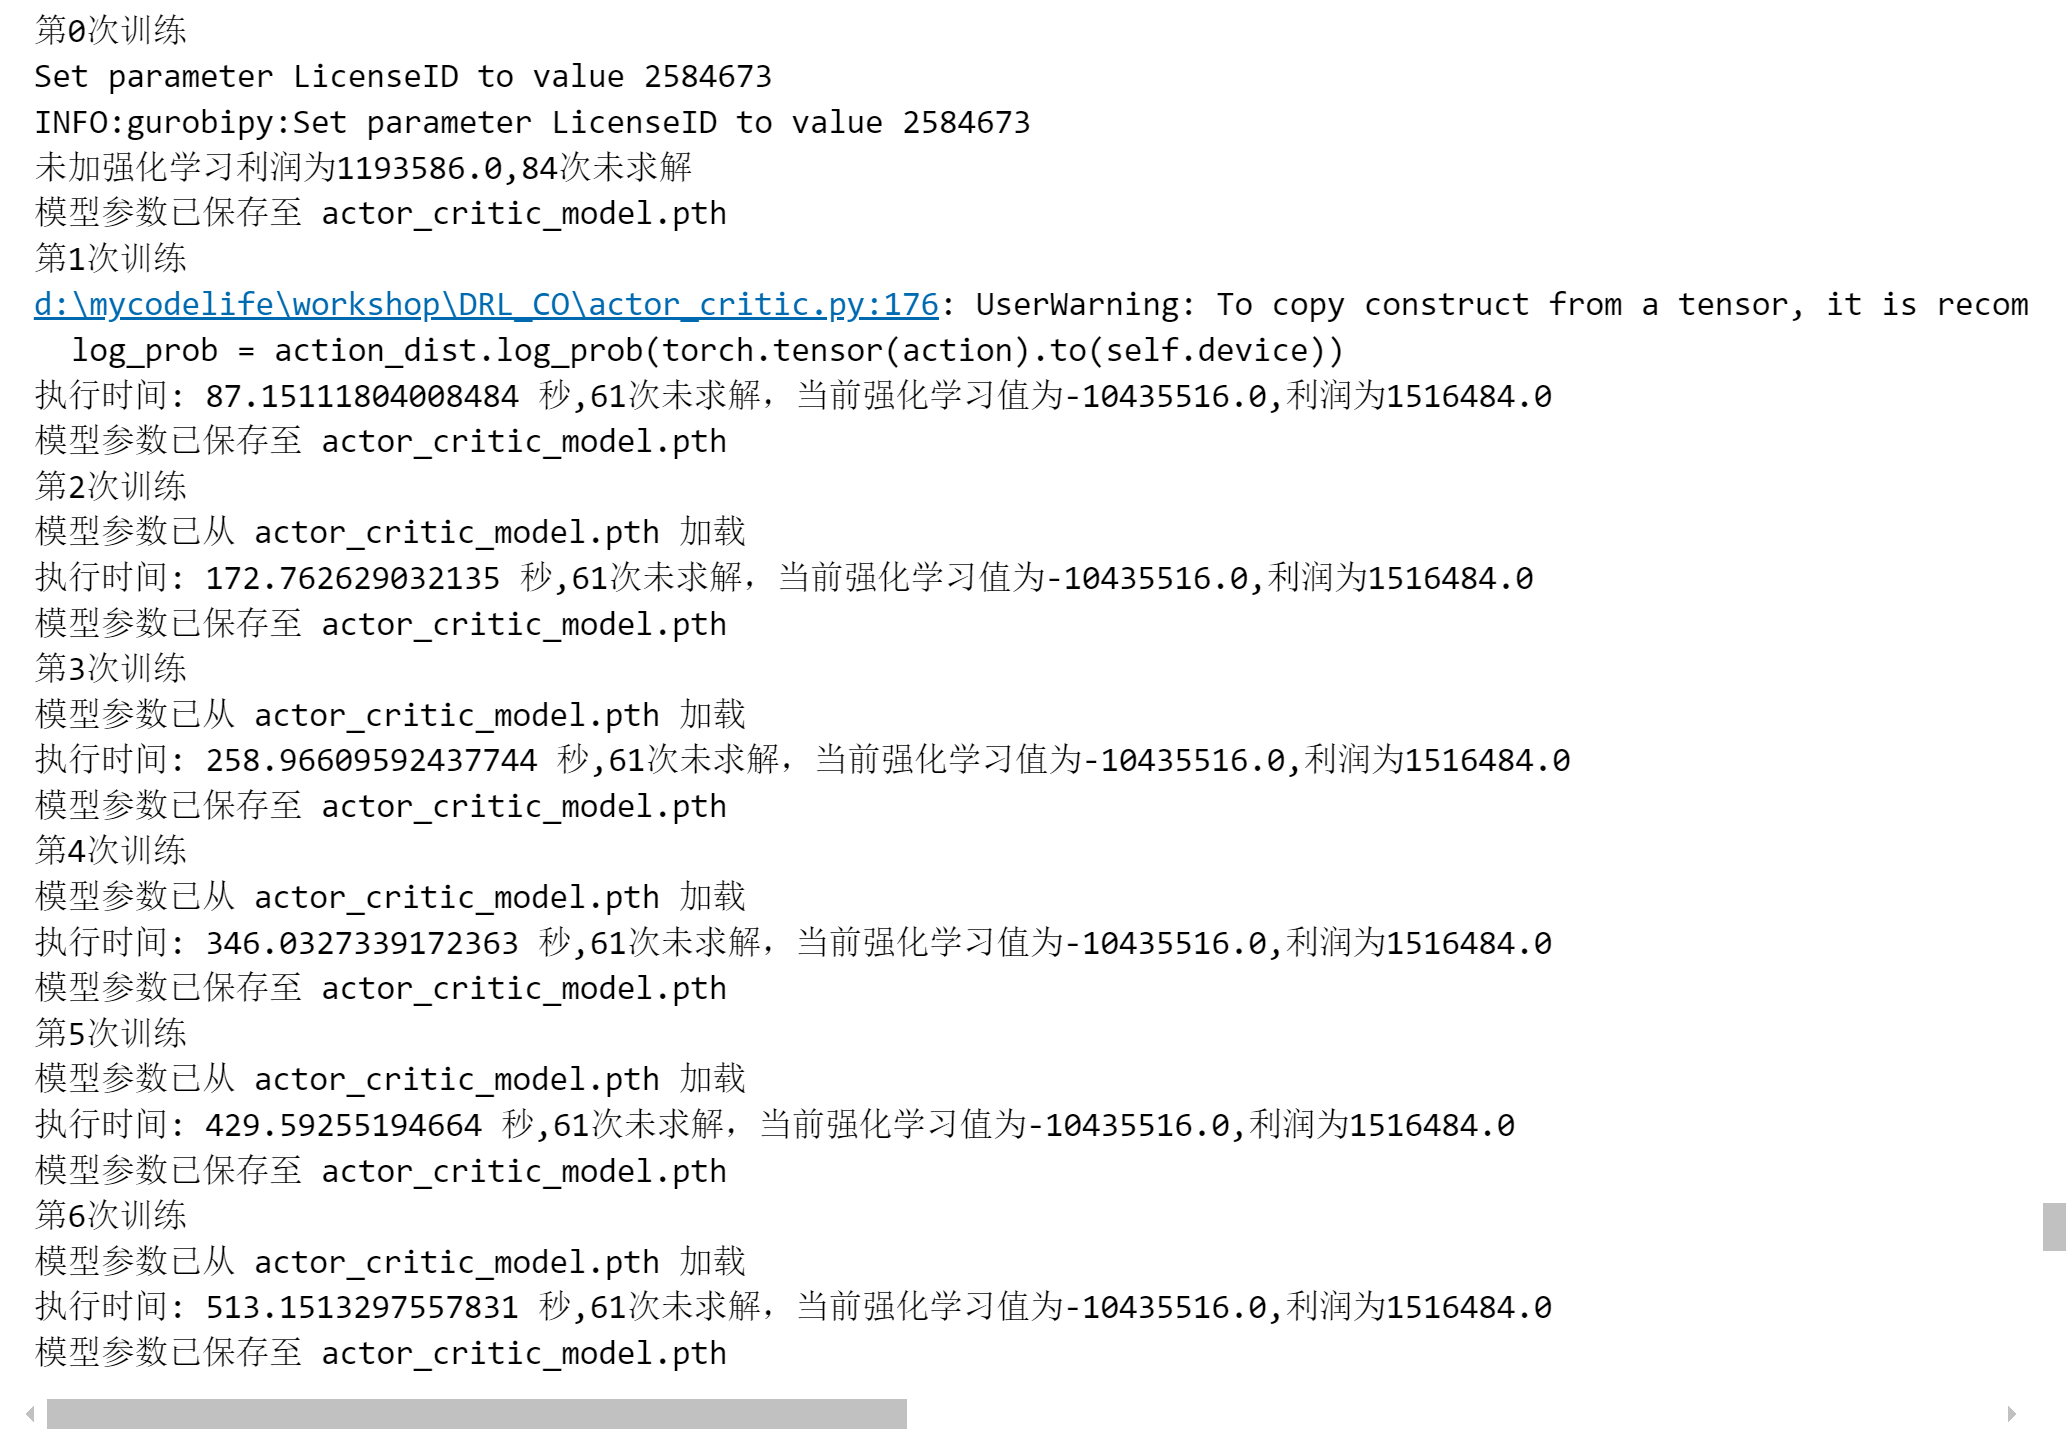

## 尽管不学习，但是每次的action却是不一样的，而grid_reward则有重复